In [3]:
#import libraries

import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC




In [4]:
#Load dataset

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

# shape
print("Shape: ",dataset.shape,"\n")

# head
print("First records of data:\n ",dataset.head(),"\n")

# class distribution
print(dataset.groupby('class').size())

Shape:  (150, 5) 

First records of data:
     sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa 

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [5]:
# Descriptions
print("Statistical description of data:\n",dataset.describe())

Statistical description of data:
        sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


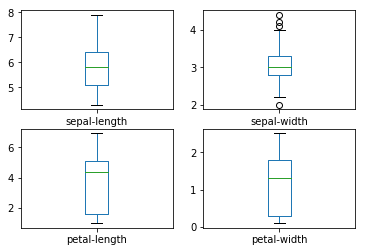

In [6]:
#Box and Whisker plots

dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

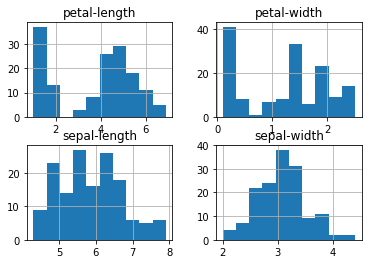

In [7]:
#histograms
dataset.hist()
plt.show()

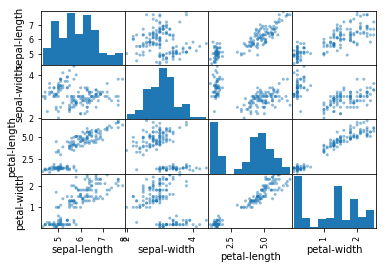

In [8]:
#Scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [9]:
#Split-out validation dataset

array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

In [10]:
#Create Model Shells (Instantiate them)

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [11]:
#Spot test each model with Cross-Validation
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

results = []
names = []

# evaluate each model in turn
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
RF: 0.958333 (0.041667)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


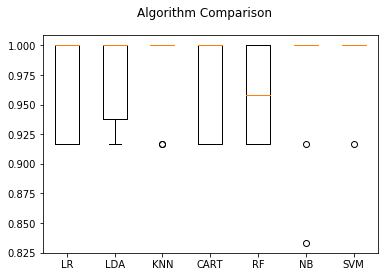

In [12]:
#Graphical comparison of algorithms

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [13]:
#Make predictions on validation dataset
#Knn 
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



In [14]:
#SVM - Support Vector Machine:
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



In [15]:
#homework 
#1. Added EDA
#2. Added Model - XGBoost

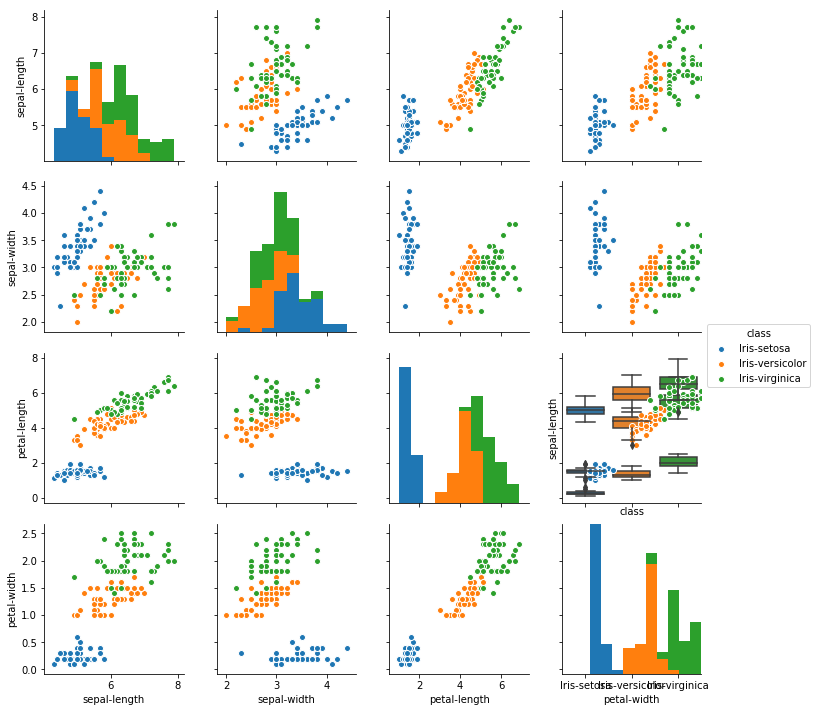

In [16]:
#Added EDA
import seaborn as sns
sns.pairplot(dataset, hue='class')
sns.boxplot(x='class', y='petal-length', data=dataset)
sns.boxplot(x='class', y='petal-width', data=dataset)
sns.boxplot(x='class', y='sepal-length', data=dataset)


In [17]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
y_pred = xgb.predict(X_validation)

accuracy = accuracy_score(Y_validation, y_pred)
print("Accuracy: %.2f" % (accuracy * 100.0))
print("\n")
print(confusion_matrix(Y_validation, y_pred))
print("\n")
print(classification_report(Y_validation, y_pred))

Accuracy: 86.67


[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

    avg / total       0.87      0.87      0.87        30



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
